# Graded Challenge 4


#### Data Set Information
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### Objective
Graded Challenge 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
# Load the Credit Card dataset
df = pd.read_csv("CC GENERAL.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Get descriptive statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (8950, 18)


### Data Cleaning
Sekarang kami akan melakukan beberapa hal untuk dataset. Pertama, mari lihat kembali datasetnya.

In [7]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


##### Dropping column
Selanjutnya, untuk kolom *(Customer ID)* tampaknya menjadi id unik untuk setiap pelanggan dan karenanya tidak akan memainkan peran apa pun dalam menentukan cluster maka akan saya hapus dari dataset.

In [8]:
df.drop(['CUST_ID'], axis=1, inplace=True)

##### Missing Value

In [9]:
# Showing out missing values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dapat kita lihat diatas bahwa untuk kolom (credit_limit) memiliki missing value hanya 1,jadi kita tidak perlu bersusah payah untuk menghitungnya. Kita bisa saja menghilangkan dan tidak pernah memikirkannya lagi.

In [10]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Sedangkan, untuk kolom (minimum_payments) terdapat 313 missing value, yang akan kita lakukan yaitu mengisinya dengan nilai median.

In [11]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

### Exploratory Data Analysis (EDA)
Mari kita visualisasikan betapa miringnya dataset kita.

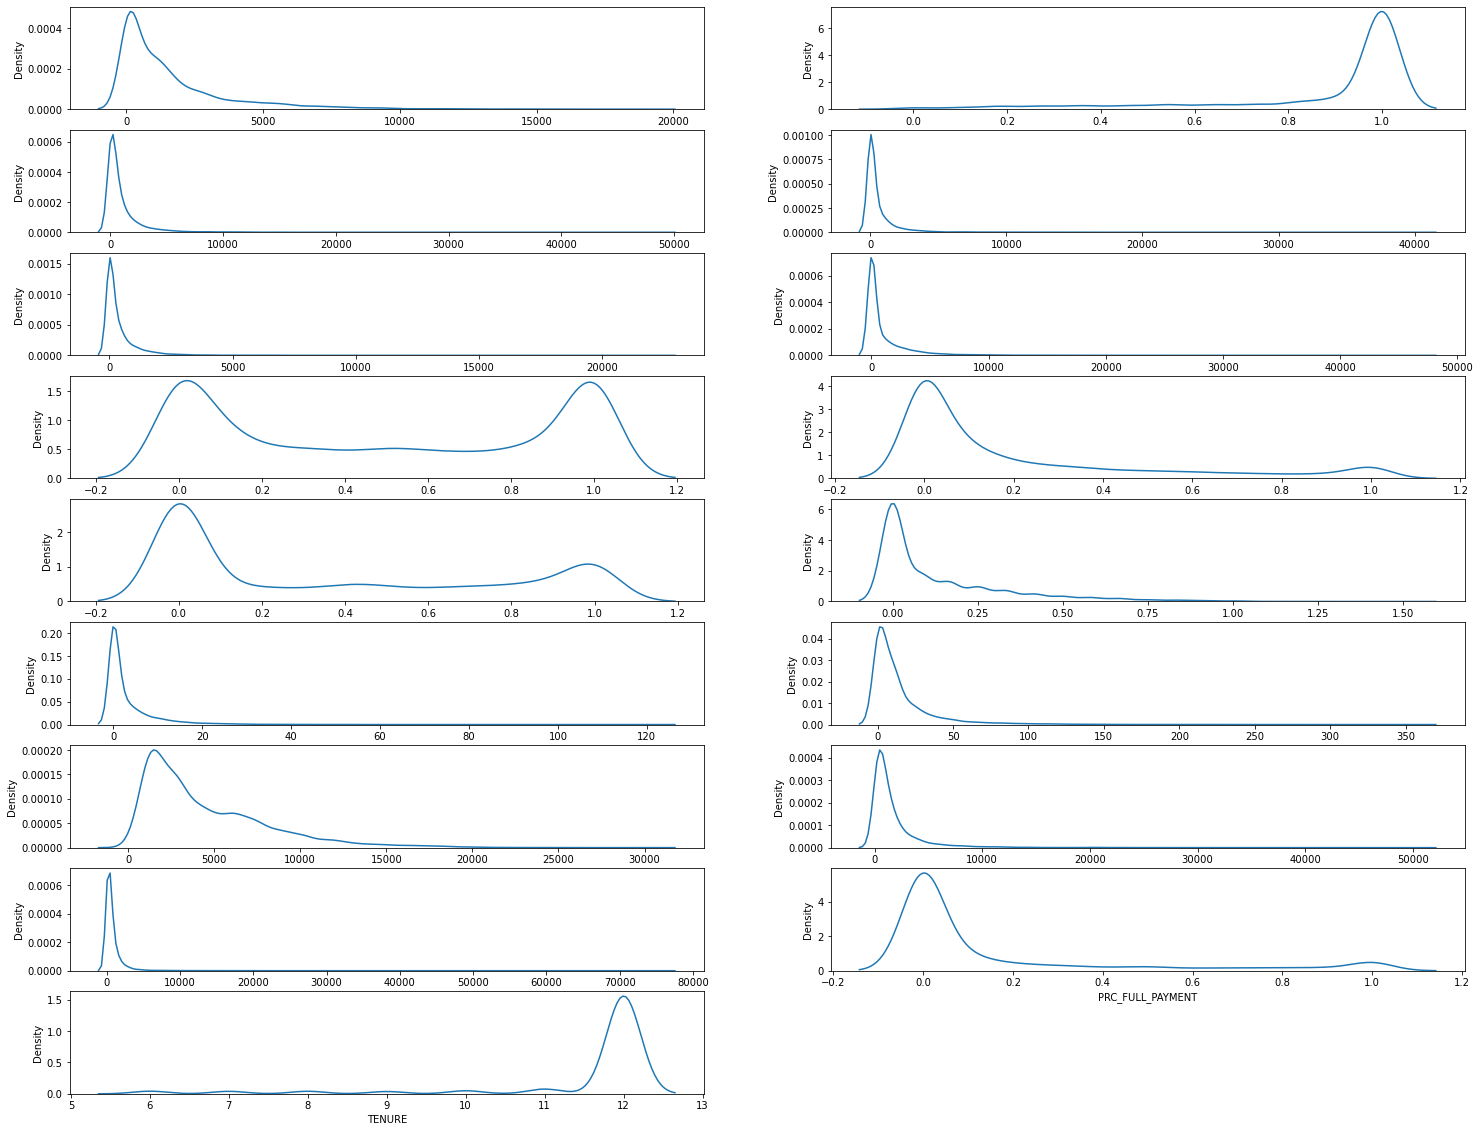

In [12]:
# Skewness
plt.figure(figsize=(25,20))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Dapat dilihat dari visualisasi diatas adanya banyak skewness dan mereka bervariasi. Ini agak diharapkan dari kumpulan data seperti ini karena akan selalu ada beberapa pelanggan yang melakukan jumlah transaksi yang sangat tinggi.

In [13]:
def scatter_purchases(x):
    sns.scatterplot(y='PURCHASES',x=x,data = df,color='#b3e0ff',alpha=0.7)

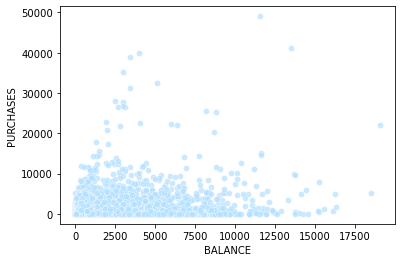

In [15]:
scatter_purchases('BALANCE')

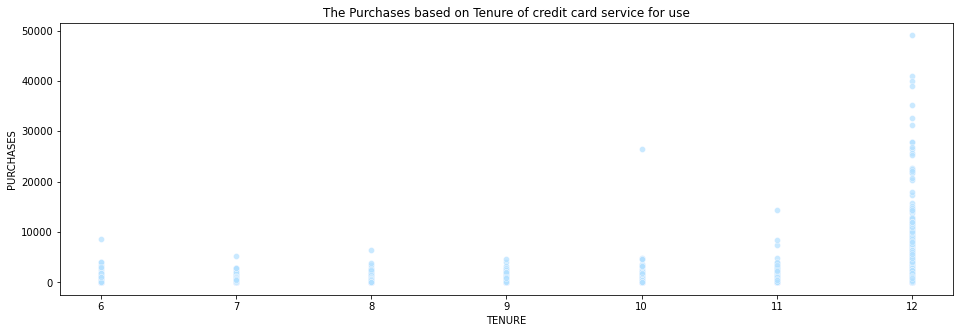

In [18]:
# Purchase based on Tenure
plt.figure(figsize=(16,5))
plt.title('The Purchases based on Tenure of credit card service for use')
scatter_purchases('TENURE')

Sekarang kami dapat mengkonfirmasi bahwa dengan peningkatan periode penggunaan kartu, harga pembelian meningkat, terutama selama satu tahun, karena ada perbedaan besar antara itu dan yang lain. Selanjutnya, kami akan melihat apakah seseorang yang memiliki masa jabatan yang lama sering memekai CC dan mengalami credit limit.

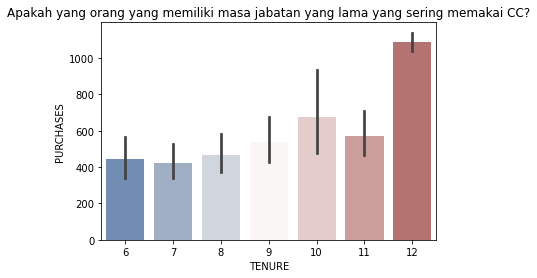

In [20]:
plt.title('Apakah yang orang yang memiliki masa jabatan yang lama yang sering memakai CC?')
sns.barplot(x='TENURE',y='PURCHASES',data=df, palette='vlag')
plt.show()

- Semakin tinggi masa jabatan seseorang belum tentu yang sering membeli barang menggunakan kartu kredit.
- Terjadinya fluktuatif dari masa jabatan 6 tahun hingga 11 tahun.
- Paling banyak pemakaian kartu kredit ada pada masa jabatan 12 tahun
- Paling sedikit pemakaian kartu kredit ada pada masa jabatan 7 tahun

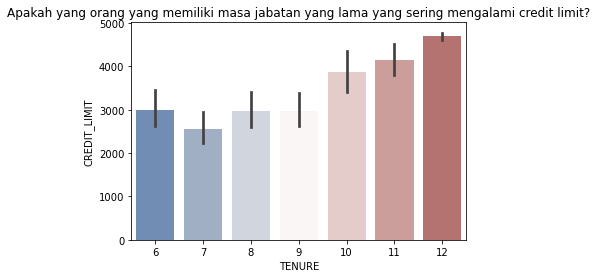

In [21]:
plt.title('Apakah yang orang yang memiliki masa jabatan yang lama yang sering mengalami credit limit?')
sns.barplot(x='TENURE',y='CREDIT_LIMIT',data=df, palette='vlag')
plt.show()

- Yang paling sering mengalami kredit limit yaitu di masa jabatan 12 tahun
- Yang paling tidak sering mengalami kredit limit yaitu di masa jabatan 7 tahun

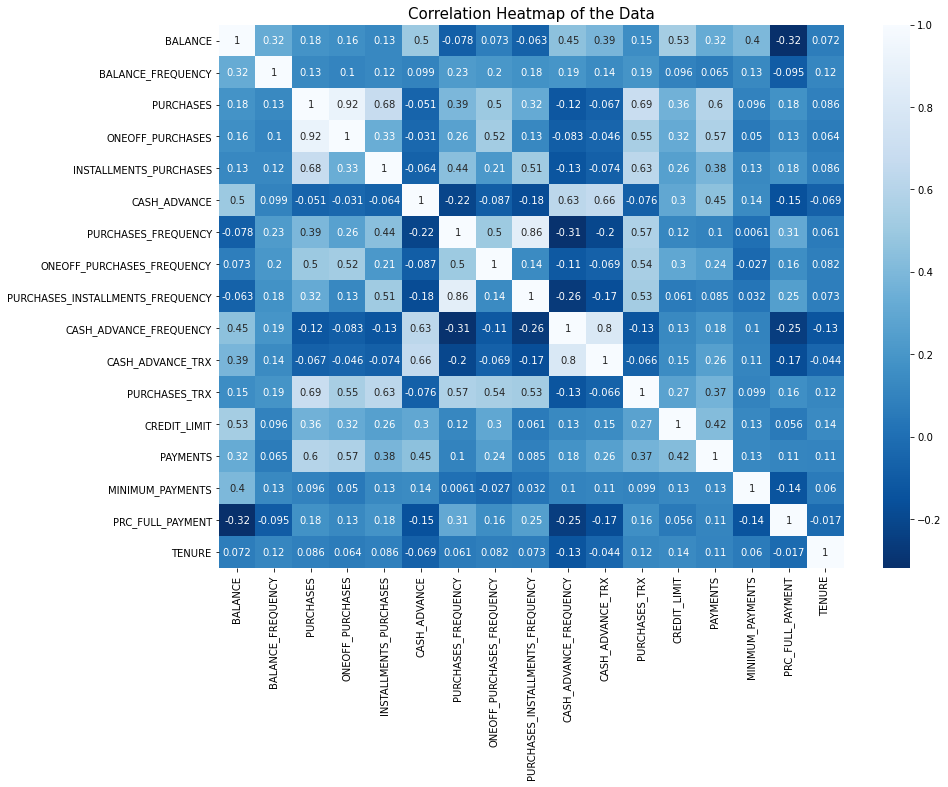

In [22]:
# Heatmap Correlation
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

High Correlation:
- PURCHASES & ONEOFFPURCHASES: 0.92
> Ketika orang menggunakan pembelian sekali pakai, jumlah pembelian lebih tinggi daripada menggunakan pembelian angsuran.
- PURCHASESFREQUENCY & PURCHASESINSTALLMENTSFREQUENCY: 0.86
> Lebih banyak orang menggunakan pembelian cicilan.
- CASHADVANCEFREQUENCY & CASHADVANCETRX: 0.80

Kami memiliki beberapa fitur yang berkorelasi di sana. Ada banyak cara untuk menangani ini. Kami akan melanjutkan dengan pengurangan dimensi dan kami akan membawa data kami ke dimensi yang lebih rendah.

### Data Pre-processing
Selanjutnya kita akan melakukan pengecekan terhadap VIF untuk mengecek apakah adanya multicol pada dataset.

| VIF     | Keterangan |
| ----------- | ----------- |
| <= 1      | Tidak terdapat Multicol      |
| < 5   | Terdapat sedikit multicol (tidak signifikan)        |
| >=      | Terdapat multicol     |


#### Numerical and Categorical

In [23]:
num = df.drop(columns=["TENURE"])
cat = df[["TENURE"]]

In [24]:
from sklearn.preprocessing import StandardScaler

#Define Scaler
scaler = StandardScaler()

#Fit and transform numerical data
num_sc = scaler.fit_transform(num)

#### Multicollinearity

In [25]:
#Cek Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num.values, i) for i in range(len(num.columns))]

vif_data

,feature,VIF
0,BALANCE,3.970333
1,BALANCE_FREQUENCY,5.456805
2,PURCHASES,58769.185466
3,ONEOFF_PURCHASES,32774.699757
4,INSTALLMENTS_PURCHASES,10399.043964
5,CASH_ADVANCE,3.444612
6,PURCHASES_FREQUENCY,26.341228
7,ONEOFF_PURCHASES_FREQUENCY,5.660867
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.302123
9,CASH_ADVANCE_FREQUENCY,4.913875


- Hanya (balance_frequency, oneoff_purchases, purchases, oneoff_purchases, installments_purchases, purchases_frequency,oneoff_purchases_frequency, oneoff_purchases_frequency,purchases_installments_frequency, dan  tenure	) yang memiliki multikol.
- Dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 8 dimensi dari 16 dimensi.

#### Reduksi Dimensi Menggunakan PCA

In [29]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=16)
pca.fit(num_sc)

PCA(n_components=16)

In [30]:
# Mengetahui EVR
pca.explained_variance_ratio_

array([2.88517078e-01, 2.15837403e-01, 9.35085227e-02, 7.54157181e-02,
       6.61445794e-02, 5.39026937e-02, 4.58279146e-02, 4.12181015e-02,
       3.28015019e-02, 2.53544523e-02, 1.88949808e-02, 1.54854994e-02,
       1.30649867e-02, 1.11689792e-02, 2.85686011e-03, 7.28069186e-07])

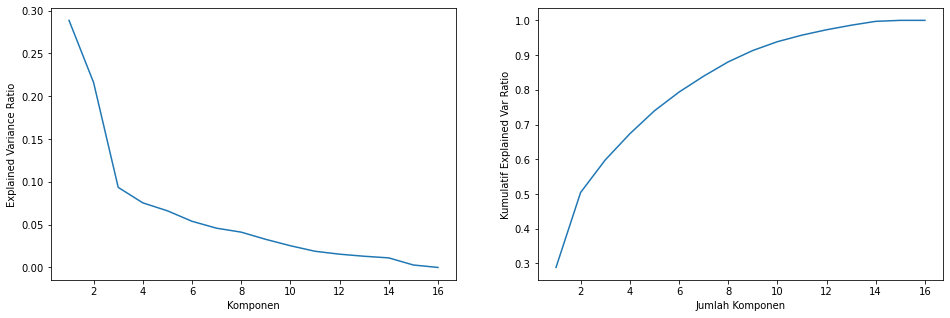

In [31]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,17),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

- Nampak bahwa adanya degredasi nilai EVR yang gradual dari komponen pertama hingga terakhir
- Nampak ada patahan di 9 komponen, dengan cumsum EVR 0.84

In [32]:
# Create model PCA 9 Dimensions
pca_fin = PCA(n_components=9)
X_train = pca_fin.fit_transform(num_sc)

Maka sekarang hanya mempunyai 9 dimensi.

### Definition Model
Dalam analisis ini, kami menggunakan beberapa model dalam *Machine Learning* sebagai model untuk melatih dataset, seperti:
1. K-Means
2. Bayesian Gaussian Mixstures

### K-Means

##### Elbow Method

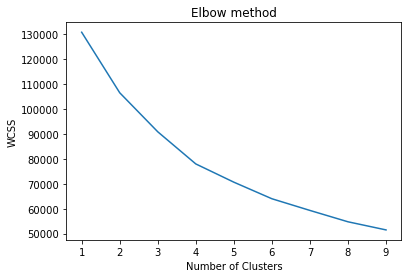

In [34]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=1).fit(X_train) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Apakah anda melihat ada patahan di atas? Sepertinya ada patahan sekitar 4 atau 5. Kami akan menggunakan skor siluet untuk melihat mana komponen yang berkinerja lebih baik.

##### Silhouette Scores

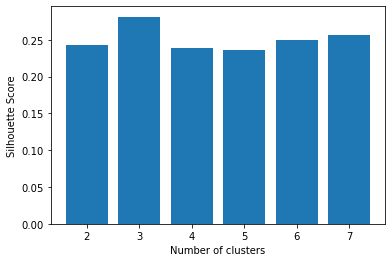

In [36]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_train, KMeans(n_clusters = n_cluster).fit_predict(X_train))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Skore siluet juga mendapatkan dengan 3 cluster. Maka diasumsikan bahwa 3 komponen menjadi komponen terbaik.

#### Final Model K-Means

In [37]:
#Define the final Model
fin_km = KMeans(n_clusters=3, random_state=42)

#Train the dataset
fin_km.fit(X_train)

KMeans(n_clusters=3, random_state=42)

###  Bayesian Gaussian Mixstures

In [38]:
from sklearn.mixture import BayesianGaussianMixture

# Gaussian
fin_bgm = BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

fin_bgm.fit(X_train)

BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

In [39]:
np.round(fin_bgm.weights_, 2)

array([0.38, 0.33, 0.3 ])

Dari hasil diatas, dengan bayesian gaussian mixsture dengan cluster = 3, didapatkan bahwa semua cluster memiliki probabilitas dataset sendiri-sendiri dan probabilitasnya bervariasi.

### Model Evaluation
Kami akan mereduksi dataset menjadi dimensi 2D meskipun tidak akan mewakili semua data, tetapi hanya untuk tujuan visualisasi.

In [40]:
# PCA 2 Dimensions
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(num_sc)

#### K-Means

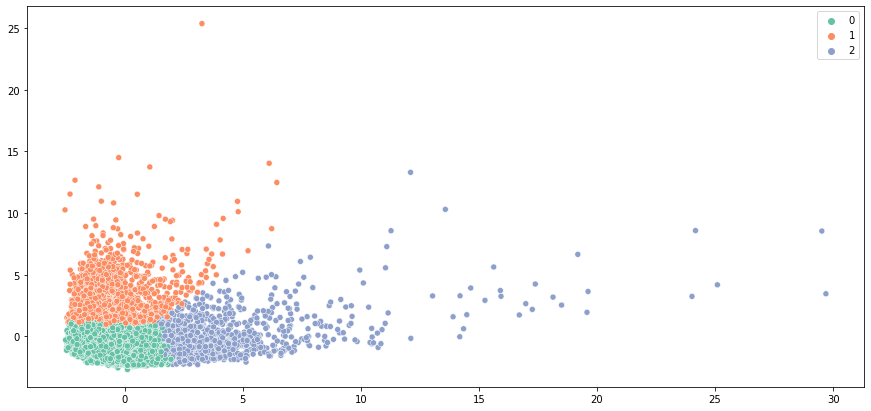

In [41]:
#Predict dataset
a = fin_km.predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train_2d[:,0], y =X_train_2d[:,1], hue=a, palette="Set2")
plt.show()

Dapat dilihat dengan menggunakan K-Means dataset tersebut terbagi menjadi 3 cluster.

#### Bayesian Gaussian Mixstures

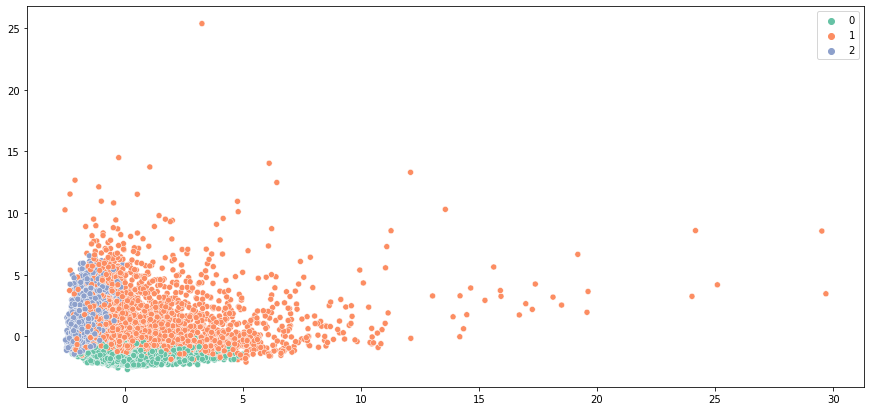

In [42]:
#Predict dataset
b = fin_bgm.fit_predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train_2d[:,0], y =X_train_2d[:,1], hue=b, palette="Set2")
plt.show()

Hasil dari visualisasi Bayesian Gaussian Mixstures walaupun sudah dibagi menjadi 4 cluster tetapi belum terlihat jelas adanya pemisahan data yang dimana bisa disebut juga dengan masih adanya bias.

### Understanding 3 Cluster

In [43]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
km_4  = KMeans(n_clusters=4, random_state=40).fit(X_train)
df['cluster'] = km_4.labels_

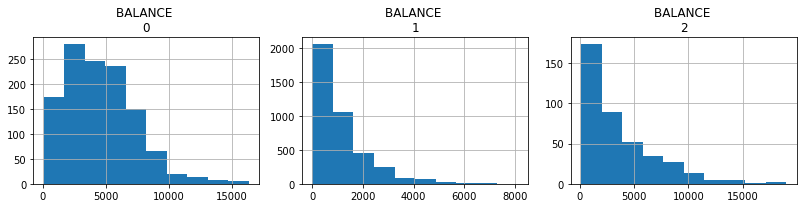

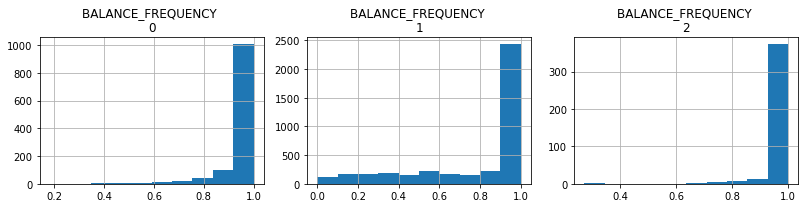

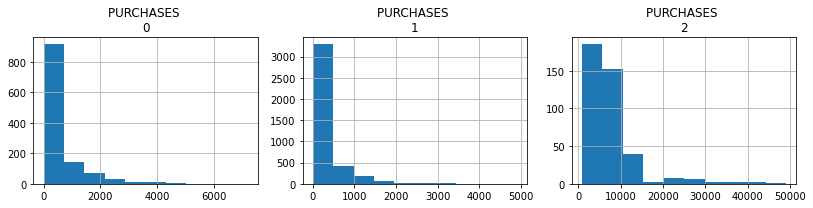

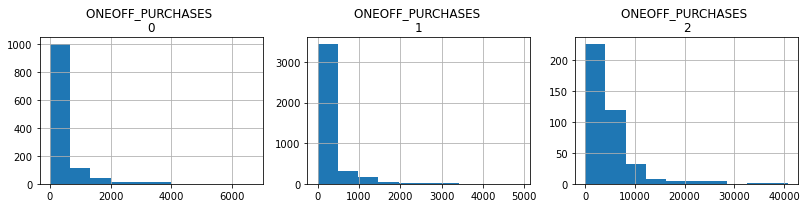

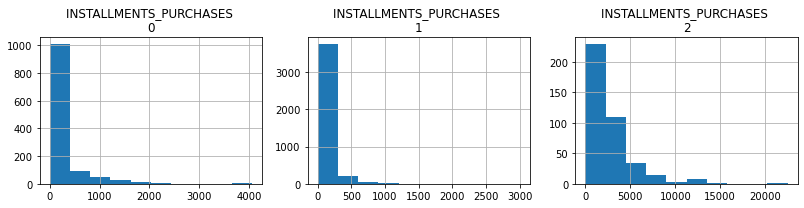

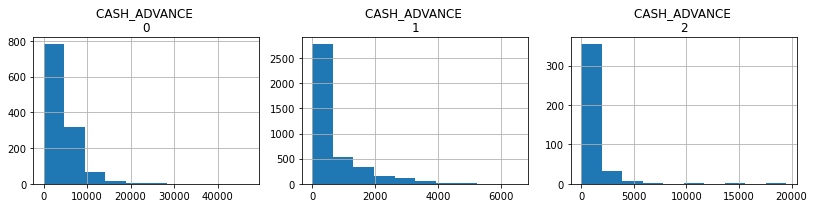

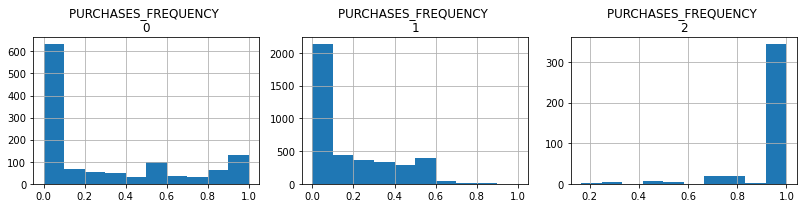

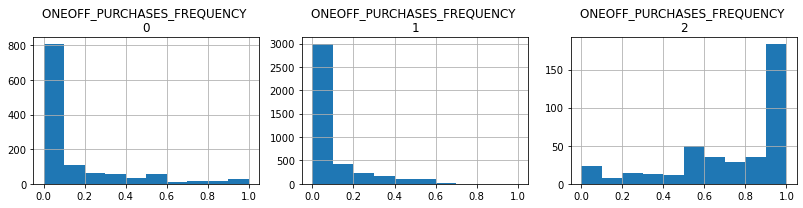

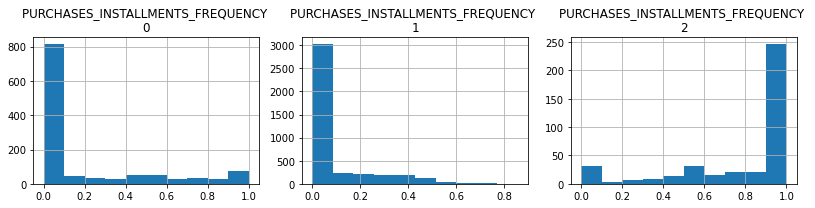

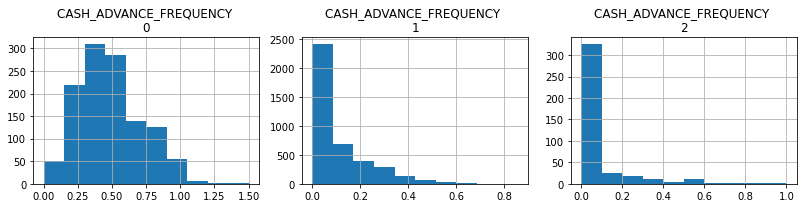

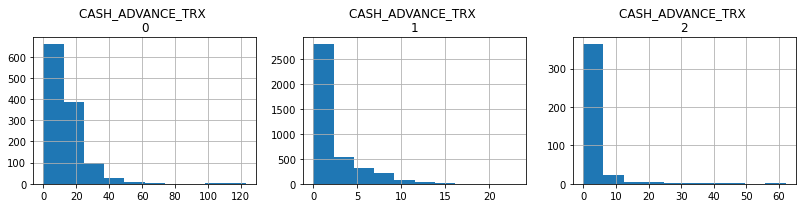

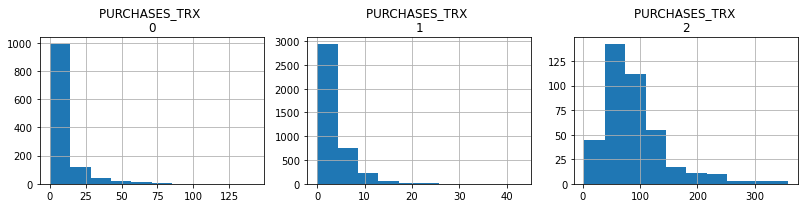

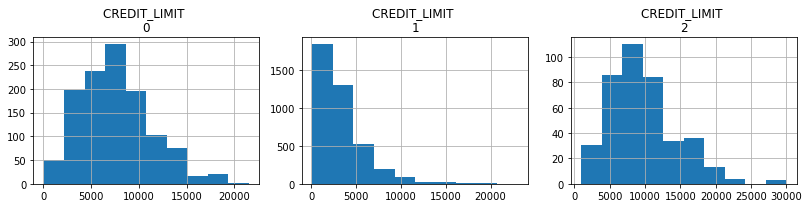

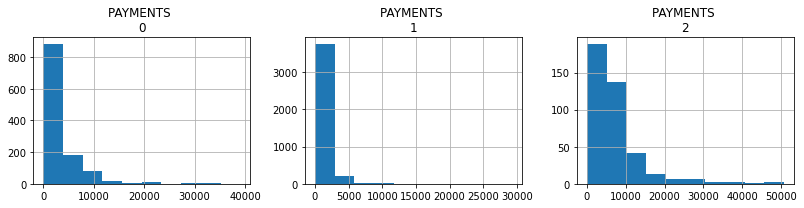

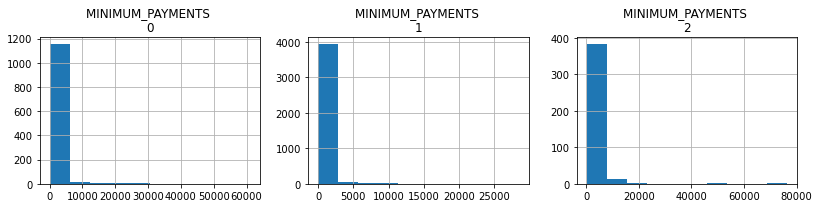

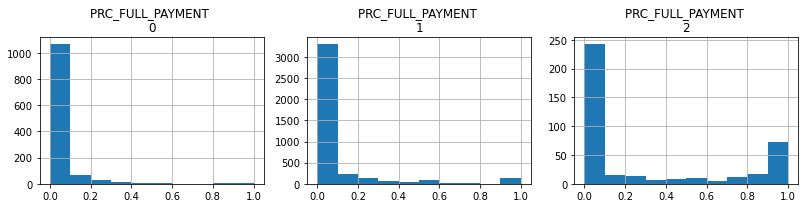

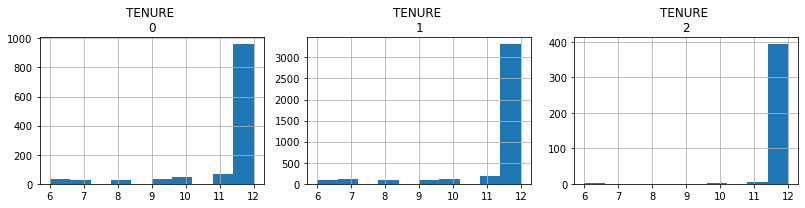

In [48]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,3):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

Setelah menjalankan metode yang berbeda, saya memilih Model Kmeans karena data tidak mencakup kelompok kecil yang berbeda tetapi sangat mirip satu sama lain.

Membandingkan 2 Model Kmeans yang berbeda menunjukkan bahwa kami memiliki pemahaman yang lebih baik tentang segmentasi pelanggan dengan menggunakan model 4 cluster. Beberapa hasil yang luar biasa:

- Cluster 0: Cluster ini menyasar kelompok nasabah yang memiliki saldo dan tarik tunai tinggi.

- Cluster 1: Cluster ini menyasar kelompok nasabah yang memiliki saldo dan tarik tunai tinggi.

- Cluster 2: Pelanggan ini sering melakukan pembelian dengan frekuensi pembelian cicilan tertinggi dengan presentasi cash advance yang rendah. Kelompok ini menggunakan kartu kreditnya mereka untuk sejumlah kecil pembelian.

### Model Inference

Pada bagian ini kami akan menggunakan 3 data acak dari kumpulan data kami sebagai uji sampel kami, untuk melakukan prediksi.

In [49]:
num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [51]:
# New Data
new = [[2495.900749,1.000000,0.00, 16.00, 0.0, 0.000000, 1.000000,0.083333, 0.083333,0.000000, 4, 2, 1000.0, 4103.032597,139.509787, 0.000000]]

#Data PreProcessing
new = scaler.transform(new)
new_data = pca_fin.transform(new) 


#Predict data
y = fin_km.predict(new_data)

print("Hasil K-Means : \n")
print('Target {}'.format(y))

Hasil K-Means : 

Target [0]


### Kesimpulan

Setelah menjalankan metode yang berbeda, saya memilih Model Kmeans karena data tidak mencakup kelompok kecil yang berbeda tetapi sangat mirip satu sama lain.

Membandingkan 2 Model Kmeans yang berbeda menunjukkan bahwa kami memiliki pemahaman yang lebih baik tentang segmentasi pelanggan dengan menggunakan model 4 cluster. Beberapa hasil yang luar biasa:

- Cluster 0: Cluster ini menyasar kelompok nasabah yang memiliki saldo dan tarik tunai tinggi.

- Cluster 1: Cluster ini menyasar kelompok nasabah yang memiliki saldo dan tarik tunai tinggi.

- Cluster 2: Pelanggan ini sering melakukan pembelian dengan frekuensi pembelian cicilan tertinggi dengan presentasi cash advance yang rendah. Kelompok ini menggunakan kartu kreditnya mereka untuk sejumlah kecil pembelian.